In [1]:
import pymongo
import numpy as np
import pandas as pd
from pandas import DataFrame
uri="mongodb://localhost:27017"
cx=pymongo.MongoClient(uri)
mndb = cx["BD_proyecto"]
mycol = mndb['bbdd1']
null = 'null' 

In [2]:
for inst in mycol.aggregate([{ "$group": {"_id": null,"MaximumValue": { "$max": "$Date" }}}]):
    fecmax=inst ['MaximumValue']
print(fecmax) 

2021-03-15


In [3]:
list_emp = []
for inst in  mycol.distinct( "Desc" ) : 
    list_emp.append(inst) 
    
print(list_emp)    

['AMZN', 'BTC_USD', 'FB', 'GOOG', 'MSFT']


In [4]:
def descarga_bbdd(emp):
    listn=[]
    for inst in mycol.find( { "Desc":emp } , {"_id": 0,"Close":1,"Date":1,"Desc":1}):
        listn.append(inst)
    return listn

n=0  
descarga=[]
for i in  list_emp: 
    emp = list_emp[n]
    print(emp)
    lista=descarga_bbdd(emp)
    descarga.append(lista)
#    print(lista)
    n+=1

AMZN
BTC_USD
FB
GOOG
MSFT


In [5]:
amzn_df = DataFrame (descarga[0])
btc_usd_df = DataFrame (descarga[1])
fb_df = DataFrame (descarga[2])
goog_df = DataFrame (descarga[3])
msft_df = DataFrame (descarga[4])

In [6]:
amzn_df.drop(['Desc'] , axis = 1, inplace = True)   
btc_usd_df.drop(['Desc'] , axis = 1, inplace = True)   
fb_df.drop(['Desc'] , axis = 1, inplace = True)   
goog_df.drop(['Desc'] , axis = 1, inplace = True)   
msft_df.drop(['Desc'] , axis = 1, inplace = True)  

In [7]:
#amzn_df2   = amzn_df.rename(columns = {"Close" : "Close"+ list_emp[0]})
#btc_usd_df2=btc_usd_df.rename(columns = {"Close" : "Close"+ list_emp[1]})  
#fb_df2     = fb_df.rename(columns = {"Close" : "Close"+ list_emp[2]})
#goog_df2   = goog_df.rename(columns = {"Close" : "Close"+ list_emp[3]})
#msft_d2f   = msft_df.rename(columns = {"Close" : "Close"+ list_emp[4]})
amzn_cierre   = amzn_df.rename(columns = {"Close" : "Close"+ list_emp[0]})
btc_usd_cierre=btc_usd_df.rename(columns = {"Close" : "Close"+ list_emp[1]})  
fb_cierre     = fb_df.rename(columns = {"Close" : "Close"+ list_emp[2]})
goog_cierre   = goog_df.rename(columns = {"Close" : "Close"+ list_emp[3]})
msft_cierre   = msft_df.rename(columns = {"Close" : "Close"+ list_emp[4]})

In [8]:
 # Establecer el índice en la columna Date para cada archivo
goog_cierre.set_index('Date', inplace = True)
fb_cierre.set_index('Date', inplace = True)
amzn_cierre.set_index('Date', inplace = True)
msft_cierre.set_index('Date', inplace = True)
btc_usd_cierre.set_index('Date', inplace = True)

In [9]:
# Integración de todos los dataframe en uno solo dataframe
df_combinado = btc_usd_cierre.join(goog_cierre).join(amzn_cierre).join(fb_cierre).join(msft_cierre) 
df_combinado.head()

,CloseBTC_USD,CloseGOOG,CloseAMZN,CloseFB,CloseMSFT
Date,,,,,
2014-09-17,457.334015,583.168884,324.000000,76.430000,46.520000
2014-09-18,424.440002,587.656616,325.000000,77.000000,46.680000
2014-09-19,394.795990,594.447937,331.320007,77.910004,47.520000
2014-09-20,408.903992,NaN,NaN,NaN,NaN
2014-09-21,398.821014,NaN,NaN,NaN,NaN


In [10]:
df_combinado.count()

CloseBTC_USD    2371
CloseGOOG       1634
CloseAMZN       1634
CloseFB         1634
CloseMSFT       1634
dtype: int64

In [11]:
df_combinado.describe().transpose()

,count,unique,top,freq
CloseBTC_USD,2371,2368,1179.969971,2
CloseGOOG,1634,1618,1098.260010,2
CloseAMZN,1634,1619,488.100006,2
CloseFB,1634,1549,137.419998,3
CloseMSFT,1634,1497,62.299999,4


In [12]:
# Dado que los valores perdidos que hay en data set se corresponden con días donde no hay cotización de las acciones 
# En la bolsa de valores, estos serán sustitudios por el último valor válido, para ello usaremos el método de pandas ffill()
# que propaga el último valor valido hacia adelante, así si el último valor valido fue de un viernes, ese valor se asignará
# al sábado y al domingo

df_combinado = df_combinado.ffill()
df_combinado.head(n=10)

,CloseBTC_USD,CloseGOOG,CloseAMZN,CloseFB,CloseMSFT
Date,,,,,
2014-09-17,457.334015,583.168884,324.000000,76.430000,46.520000
2014-09-18,424.440002,587.656616,325.000000,77.000000,46.680000
2014-09-19,394.795990,594.447937,331.320007,77.910004,47.520000
2014-09-20,408.903992,594.447937,331.320007,77.910004,47.520000
2014-09-21,398.821014,594.447937,331.320007,77.910004,47.520000
2014-09-22,402.152008,585.761780,324.500000,76.800003,47.060001
2014-09-23,435.790985,579.538879,323.630005,78.290001,46.560001
2014-09-24,423.204987,586.380066,328.209991,78.540001,47.080002
2014-09-25,411.574005,573.485474,321.929993,77.220001,46.040001


In [13]:
df_combinad2   = df_combinado.astype(float) 
#goog_cierre    = goog_df2['CloseGOOG'].astype(float) 
#fb_cierre      = fb_df2['CloseFB'].astype(float) 
#amzn_cierre    = amzn_df2['CloseAMZN'].astype(float) 
#msft_cierre    = msft_d2f['CloseMSFT'].astype(float) 
#btc_usd_cierre = btc_usd_df2['CloseBTC_USD'].astype(float) 
print(df_combinad2.dtypes)

CloseBTC_USD    float64
CloseGOOG       float64
CloseAMZN       float64
CloseFB         float64
CloseMSFT       float64
dtype: object


<AxesSubplot:>

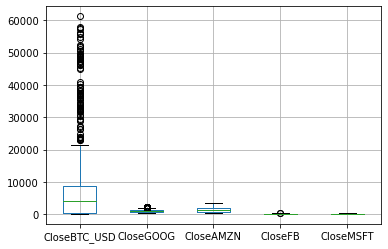

In [14]:
df_combinad2.boxplot()

<AxesSubplot:xlabel='Date'>

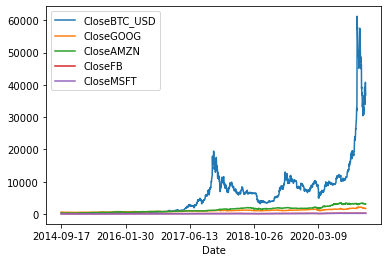

In [15]:
df_combinad2.loc[:, ['CloseBTC_USD','CloseGOOG','CloseAMZN','CloseFB','CloseMSFT']].plot()

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

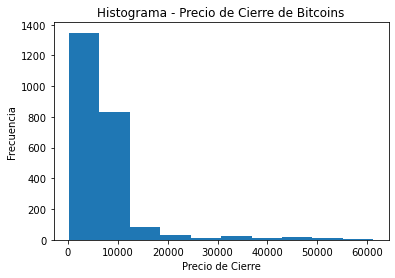

In [17]:


plt.hist(x=df_combinad2.iloc[:,0])
plt.title('Histograma - Precio de Cierre de Bitcoins')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()



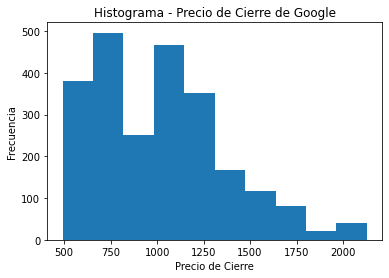

In [18]:
plt.hist(x=df_combinad2.iloc[:,1])
plt.title('Histograma - Precio de Cierre de Google')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

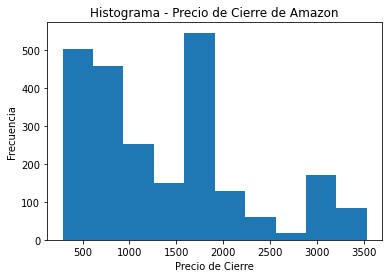

In [19]:
plt.hist(x=df_combinad2.iloc[:,2])
plt.title('Histograma - Precio de Cierre de Amazon')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

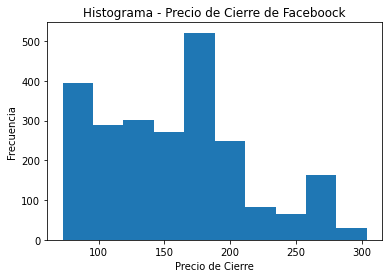

In [20]:


plt.hist(x=df_combinad2.iloc[:,3])
plt.title('Histograma - Precio de Cierre de Faceboock')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()



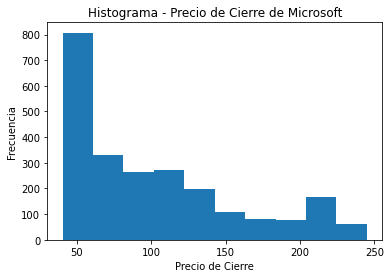

In [21]:
plt.hist(x=df_combinad2.iloc[:,4])
plt.title('Histograma - Precio de Cierre de Microsoft')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

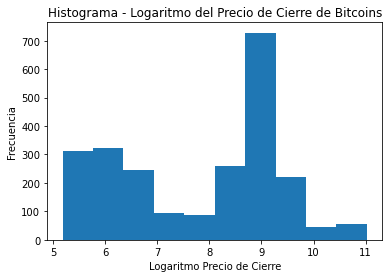

In [22]:
plt.hist(x=np.log(df_combinad2.iloc[:,0]))
plt.title('Histograma - Logaritmo del Precio de Cierre de Bitcoins')
plt.xlabel('Logaritmo Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

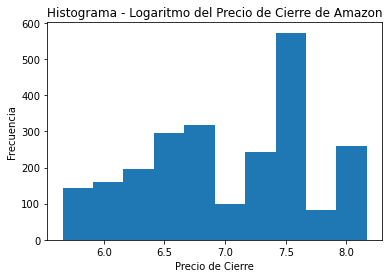

In [23]:


plt.hist(x=np.log(df_combinad2.iloc[:,2]))
plt.title('Histograma - Logaritmo del Precio de Cierre de Amazon')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()



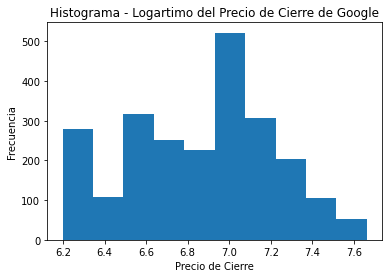

In [24]:


plt.hist(x=np.log(df_combinad2.iloc[:,1]))
plt.title('Histograma - Logartimo del Precio de Cierre de Google')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()



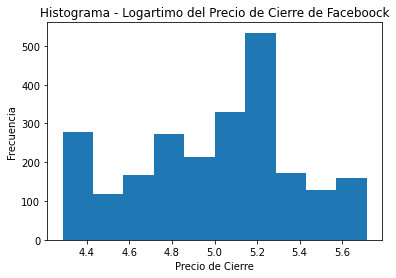

In [25]:
plt.hist(x=np.log(df_combinad2.iloc[:,3]))
plt.title('Histograma - Logartimo del Precio de Cierre de Faceboock')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

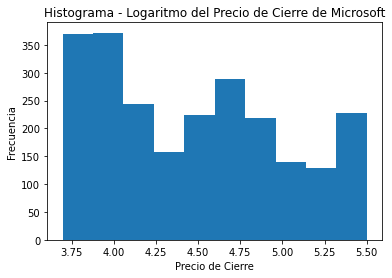

In [26]:


plt.hist(x=np.log(df_combinad2.iloc[:,4]))
plt.title('Histograma - Logaritmo del Precio de Cierre de Microsoft')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()



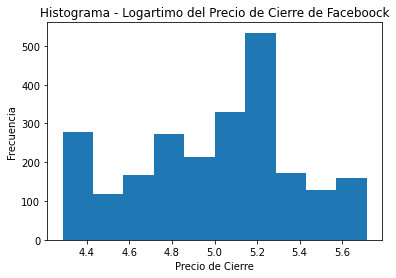

In [27]:
plt.hist(x=np.log(df_combinad2.iloc[:,3]))
plt.title('Histograma - Logartimo del Precio de Cierre de Faceboock')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

<AxesSubplot:>

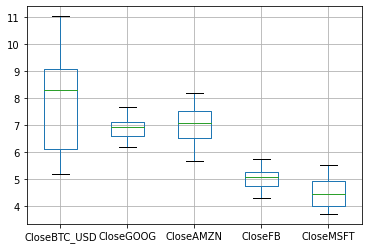

In [28]:
df_combinad2_log = np.log(df_combinad2)

df_combinad2_log.loc[:, ['CloseBTC_USD','CloseGOOG','CloseAMZN','CloseFB','CloseMSFT']].boxplot()

<AxesSubplot:xlabel='Date'>

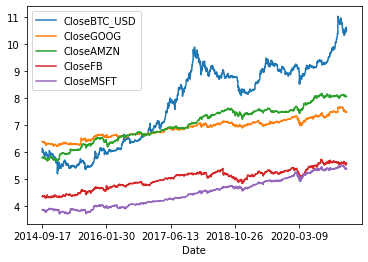

In [29]:
df_combinad2_log.loc[:,  ['CloseBTC_USD','CloseGOOG','CloseAMZN','CloseFB','CloseMSFT']].plot()

In [30]:
df_combinad2_log.head()

,CloseBTC_USD,CloseGOOG,CloseAMZN,CloseFB,CloseMSFT
Date,,,,,
2014-09-17,6.125414,6.368477,5.780744,4.336375,3.839882
2014-09-18,6.050771,6.376143,5.783825,4.343805,3.843316
2014-09-19,5.978369,6.387633,5.803085,4.355554,3.861151
2014-09-20,6.013480,6.387633,5.803085,4.355554,3.861151
2014-09-21,5.988513,6.387633,5.803085,4.355554,3.861151


In [31]:
df_combinad2_log.tail()

,CloseBTC_USD,CloseGOOG,CloseAMZN,CloseFB,CloseMSFT
Date,,,,,
2021-01-10,10.554678,7.476880,8.043731,5.548453,5.382153
2021-01-09,10.602978,7.476880,8.043731,5.548453,5.382153
2021-01-08,10.616379,7.499539,8.065485,5.589381,5.391899
2021-01-07,10.580786,7.488433,8.059011,5.593744,5.385824
2021-01-06,10.513915,7.458930,8.051462,5.573332,5.357765



# ¿Cuántos rezagos usar?

Dado que el objetivo del proyecot es predecir los precios de cierre de Bitcoins, en función de los precios de cierre de las empresas de tecnología seleccionadas, tendremos que determinar primero con cuantos periodos de rezagos debemos trabajar, esto es si queremos saber el precio de cierre del Bitcoins en el período t, la idea sería tomar los precios de cierre en los períodos anteriores (t-1, t-2, t-2, t-4...t-k) que son conocidos al momento de hacer la predicción.

Los siguientes pasos modificaran el dataframe, para lograr esta estructura para modelar

Trabajaremos con el dataframe transformado en logarítmos


In [32]:
print("Número de filas del dataframe original: ",df_combinad2.shape[0])
print("Número de filas del dataframe transformado en logaritmos: ",df_combinad2_log.shape[0])

Número de filas del dataframe original:  2371
Número de filas del dataframe transformado en logaritmos:  2371


In [33]:
# Matriz de correlaciones del dataframe en logaritmos y en diferencias de logaritmos

print("Matriz de correlaciones del dataframe en logaritmos")
print()
print(df_combinad2_log.corr())
print()

Matriz de correlaciones del dataframe en logaritmos

              CloseBTC_USD  CloseGOOG  CloseAMZN   CloseFB  CloseMSFT
CloseBTC_USD      1.000000   0.944999   0.931001  0.939099   0.916822
CloseGOOG         0.944999   1.000000   0.977612  0.972201   0.963635
CloseAMZN         0.931001   0.977612   1.000000  0.960809   0.960348
CloseFB           0.939099   0.972201   0.960809  1.000000   0.926048
CloseMSFT         0.916822   0.963635   0.960348  0.926048   1.000000



In [34]:
# Con estas dos funciones se generan los datos al número de rezagos que se quiera modelar

def rezagos_y(df, rezagos):
    y = df.iloc[0:df_combinad2.shape[0]-rezagos]
    return y

def rezagos_X(df, rezagos):
    X = df.iloc[rezagos:df_combinad2.shape[0]]
    return X

In [35]:
# Separación de los datasets de entrenamiento y prueba para los rezagos desede i= 1...7

y = df_combinad2_log.iloc[:,0]
X = df_combinad2_log.loc[:,['CloseGOOG','CloseAMZN','CloseFB','CloseMSFT']]
y_list = []
X_list = []

for i in range(1,8):
    y_rezagos = rezagos_y(y,i)
    y_list.append(y_rezagos)
    X_rezagos =rezagos_X(X,i)
    X_list.append(X_rezagos)

In [36]:
# Librerias para correr Regresión - Un Rezago
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Listas donde se va a guardar el error cuadrático medio y el coeficiente de determinación de cada uno de los modelos
EcmTrainRegMult = []
R2_TrainRegMult = []
EcmTestRegMult = []
R2_TestRegMult = []
X_trainStand = []
y_trainStand = []
X_testStand = []
y_testStand =[]
predTest =[]


#Entrenamiento del algoritmode regresión lineal múltiple para los modelos con rezagos desde 1 hasta 7
for i in range(7):
    #Se estandarizan los datos por las variciones en las magnitudes,
    #aún cuando todas las variables están en la misma escacal (log(USD))

    y =y_list[i].values
    y =y.reshape(-1,1)
    X = X_list[i]
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X = sc_X.fit_transform(X)
    y = sc_y.fit_transform(y)
    

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1964)
    #Actualizar lista con DF estandarizados
    X_trainStand.append(X_train)
    y_trainStand.append(y_train)
    X_testStand.append(X_test)
    y_testStand.append(y_test)
    # Estimación de los modelos
    modeloRLineal = linear_model.LinearRegression()
    modeloRLineal.fit(X_train, y_train)
    # Predicciones con los datos de entrenamiento
    y_predTrain= modeloRLineal.predict(X_train)
    
    ErrorCueadraticoMedioTrain = mean_squared_error(y_train, y_predTrain)
    EcmTrainRegMult.append(ErrorCueadraticoMedioTrain)
    R2_Train = r2_score(y_train, y_predTrain)
    R2_TrainRegMult.append(R2_Train)

    #Validación del algoritmo de regresión lineal múltiple para los modelos con rezagos desde 1 hasta 7
    
    # Predicciones sobre el conjunto de prueba
    y_predTest = modeloRLineal.predict(X_test)
    predTest.append(y_predTest)
    ErrorCuadraticoMedioTest = mean_squared_error(y_test, y_predTest)
    EcmTestRegMult.append(ErrorCuadraticoMedioTest)
    R2_Test = r2_score(y_test, y_predTest)
    R2_TestRegMult.append(R2_Test)

In [37]:
import sklearn.svm as svm


#Listas donde se va a guardar el error cuadrático medio y el coeficiente de determinación de cada uno de los modelos

kernel = ['linear', 'poly', 'rbf']

# SVM - kernel lineal
EcmTrainSVR_Klinear = []
R2_TrainSVR_Klinear = []
EcmTestSVR_Klinear = []
R2_TestSVR_Klinear = []
predTestSVR_Klinear =[]

# SVM - kernel Polinómico
EcmTrainSVR_Kpoly = []
R2_TrainSVR_Kpoly = []
EcmTestSVR_Kpoly = []
R2_TestSVR_Kpoly = []
predTestSVR_Kpoly =[]

# SVM - kernel rbf

EcmTrainSVR_Krbf = []
R2_TrainSVR_Krbf = []
EcmTestSVR_Krbf = []
R2_TestSVR_Krbf = []
predTestSVR_Krbf =[]

In [38]:
# Entrenamiento preduicción correspondiete a los modelos SVM

for k in range(len(kernel)):
    for i in range(7):
        if kernel[k] == "linear":
            # Entrenamiento SVM - Kernel lieal
            modeloSVR_Klinear = svm.SVR(kernel=kernel[k], gamma='auto')
            modeloSVR_Klinear.fit(X_trainStand[i], y_trainStand[i])
            # Predicciones con los datos de entrenamiento
            y_predTrain= modeloSVR_Klinear.predict(X_trainStand[i])
            
            # Cálculo de las medidas de ajuste del algoritmo conjunto de entrenamiento
            ErrorCueadraticoMedioTrain = mean_squared_error(y_trainStand[i], y_predTrain)
            EcmTrainSVR_Klinear.append(ErrorCueadraticoMedioTrain)
            R2_Train = r2_score(y_trainStand[i], y_predTrain)
            R2_TrainSVR_Klinear.append(R2_Train)
            
            # Predicciones sobre el conjunto de prueba
            y_predTest = modeloSVR_Klinear.predict(X_testStand[i])
            predTestSVR_Klinear.append(y_predTest)
           
            # Cálculo de las medidas de ajuste del algoritmo conjunto de entrenamiento
            ErrorCuadraticoMedioTest = mean_squared_error(y_testStand[i], y_predTest)
            EcmTestSVR_Klinear.append(ErrorCuadraticoMedioTest)
            R2_Test = r2_score(y_testStand[i], y_predTest)
            R2_TestSVR_Klinear.append(R2_Test)

        elif kernel[k] == "poly":
            # Entrenamiento SVM - Kernel polinómico
            modeloSVR_Kpoly = svm.SVR(kernel=kernel[k], gamma='auto')
            modeloSVR_Kpoly.fit(X_trainStand[i], y_trainStand[i])
            # Predicciones con los datos de entrenamiento
            y_predTrain= modeloSVR_Kpoly.predict(X_trainStand[i])

            # Cálculo de las medidas de ajuste del algoritmo
            ErrorCueadraticoMedioTrain = mean_squared_error(y_trainStand[i], y_predTrain)
            EcmTrainSVR_Kpoly.append(ErrorCueadraticoMedioTrain)
            R2_Train = r2_score(y_trainStand[i], y_predTrain)
            R2_TrainSVR_Kpoly.append(R2_Train)
            
            # Predicciones sobre el conjunto de prueba
            y_predTest = modeloSVR_Kpoly.predict(X_testStand[i])
            predTestSVR_Kpoly.append(y_predTest)
            
            # Cálculo de las medidas de ajuste del algoritmo conjunto de entrenamiento
            ErrorCuadraticoMedioTest = mean_squared_error(y_testStand[i], y_predTest)
            EcmTestSVR_Kpoly.append(ErrorCuadraticoMedioTest)
            R2_Test = r2_score(y_testStand[i], y_predTest)
            R2_TestSVR_Kpoly.append(R2_Test)

        else:
            # Entrenamiento SVM - Kernel rbf
            modeloSVR_Krbf = svm.SVR(kernel=kernel[k], gamma='auto')
            modeloSVR_Krbf.fit(X_trainStand[i], y_trainStand[i])
            # Predicciones con los datos de entrenamiento
            y_predTrain= modeloSVR_Krbf.predict(X_trainStand[i])

            # Cálculo de las medidas de ajuste del algoritmo
            ErrorCueadraticoMedioTrain = mean_squared_error(y_trainStand[i], y_predTrain)
            EcmTrainSVR_Krbf.append(ErrorCueadraticoMedioTrain)
            R2_Train = r2_score(y_trainStand[i], y_predTrain)
            R2_TrainSVR_Krbf.append(R2_Train)
            
            # Predicciones sobre el conjunto de prueba
            y_predTest = modeloSVR_Krbf.predict(X_testStand[i])
            predTestSVR_Krbf.append(y_predTest)
            
            # Cálculo de las medidas de ajuste del algoritmo conjunto de entrenamiento
            ErrorCuadraticoMedioTest = mean_squared_error(y_testStand[i], y_predTest)
            EcmTestSVR_Krbf.append(ErrorCuadraticoMedioTest)
            R2_Test = r2_score(y_testStand[i], y_predTest)
            R2_TestSVR_Krbf.append(R2_Test)

C:\Users\jogar\anaconda3.8\envs\ITT_Bigdata\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jogar\anaconda3.8\envs\ITT_Bigdata\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jogar\anaconda3.8\envs\ITT_Bigdata\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jogar\anaconda3.8\envs\ITT_Bigdata\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [39]:
'''A continuación se imprimen el ajuste de los 28 modelos corridos a saber:
    1.- Siete modelos de Regresión Múltiple.
    2.- Siete modelos de Máquina de Soporte Vectorial, con kernel Lineal.
    3.- Siete modelos de Máquina de Soporte Vectorial, con kernel Polinómico.
    4.- Siete modelos de Máquina de Soporte Vectorial, con kernel Radial.'''

print("=====================================================================================================")
print("Resumen de los modelos de Regresión corrido para los rezagos de 1 hasta siete:")
print()
print("El menor Error Cuadrático Medio en los datos de entreanamientos es:", round(np.min(EcmTrainRegMult), 4))
print("Corresponde al modelo con: ",EcmTrainRegMult.index(np.min(EcmTrainRegMult))+1," Rezago(s)")
print()
print("El mayor Coeficiente de determinación (R2) en los datos de entreanamientos es:", round(np.max(R2_TrainRegMult), 4))
print("Corresponde al modelo con: ",R2_TrainRegMult.index(np.max(R2_TrainRegMult))+1," Rezago(s)")
print()
print("El menor Error Cuadrático Medio en los datos de prueba es:", round(np.min(EcmTestRegMult), 4))
print("Corresponde al modelo con: ",EcmTestRegMult.index(np.min(EcmTestRegMult))+1," Rezago(s)")
print()
print("El mayor Coeficiente de determinación (R2) en los datos de prueba es:", round(np.max(R2_TestRegMult), 4))
print("Corresponde al modelo con: ",R2_TestRegMult.index(np.max(R2_TestRegMult))+1," Rezago(s)")



for k in range(len(kernel)):
    print("=====================================================================================================")
    print("Resumen de los modelos de SVM -Kernel", kernel[k], ", corrido para los rezagos de 1 hasta siete:")
    print()
    
    if kernel[k] == 'linear':
        print("El menor Error Cuadrático Medio en los datos de entreanamientos es:", round(np.min(EcmTrainSVR_Klinear), 4))
        print("Corresponde al modelo con: ",EcmTrainSVR_Klinear.index(np.min(EcmTrainSVR_Klinear))+1," Rezago(s)")
        print()
        print("El mayor Coeficiente de determinación (R2) en los datos de entreanamientos es:", round(np.max(R2_TrainSVR_Klinear), 4))
        print("Corresponde al modelo con: ",R2_TrainSVR_Klinear.index(np.max(R2_TrainSVR_Klinear))+1," Rezago(s)")
        print()
        print("El menor Error Cuadrático Medio en los datos de prueba es:", round(np.min(EcmTestSVR_Klinear), 4))
        print("Corresponde al modelo con: ",EcmTestSVR_Klinear.index(np.min(EcmTestSVR_Klinear))+1," Rezago(s)")
        print()
        print("El mayor Coeficiente de determinación (R2) en los datos de prueba es:", round(np.max(R2_TestSVR_Klinear), 4))
        print("Corresponde al modelo con: ",R2_TestSVR_Klinear.index(np.max(R2_TestSVR_Klinear))+1," Rezago(s)")
        
    elif kernel[k] == 'poly':
        print("El menor Error Cuadrático Medio en los datos de entreanamientos es:", round(np.min(EcmTrainSVR_Kpoly), 4))
        print("Corresponde al modelo con: ",EcmTrainSVR_Kpoly.index(np.min(EcmTrainSVR_Kpoly))+1," Rezago(s)")
        print()
        print("El mayor Coeficiente de determinación (R2) en los datos de entreanamientos es:", round(np.max(R2_TrainSVR_Kpoly), 4))
        print("Corresponde al modelo con: ",R2_TrainSVR_Kpoly.index(np.max(R2_TrainSVR_Kpoly))+1," Rezago(s)")
        print()
        print("El menor Error Cuadrático Medio en los datos de prueba es:", round(np.min(EcmTestSVR_Kpoly), 4))
        print("Corresponde al modelo con: ",EcmTestSVR_Kpoly.index(np.min(EcmTestSVR_Kpoly))+1," Rezago(s)")
        print()
        print("El mayor Coeficiente de determinación (R2) en los datos de prueba es:", round(np.max(R2_TestSVR_Kpoly), 4))
        print("Corresponde al modelo con: ",R2_TestSVR_Kpoly.index(np.max(R2_TestSVR_Kpoly))+1," Rezago(s)")

    else:
        print("El menor Error Cuadrático Medio en los datos de entreanamientos es:", round(np.min(EcmTrainSVR_Krbf), 4))
        print("Corresponde al modelo con: ",EcmTrainSVR_Krbf.index(np.min(EcmTrainSVR_Krbf))+1," Rezago(s)")
        print()
        print("El mayor Coeficiente de determinación (R2) en los datos de entreanamientos es:", round(np.max(R2_TrainSVR_Krbf), 4))
        print("Corresponde al modelo con: ",R2_TrainSVR_Krbf.index(np.max(R2_TrainSVR_Krbf))+1," Rezago(s)")
        print()
        print("El menor Error Cuadrático Medio en los datos de prueba es:", round(np.min(EcmTestSVR_Krbf), 4))
        print("Corresponde al modelo con: ",EcmTestSVR_Krbf.index(np.min(EcmTestSVR_Krbf))+1," Rezago(s)")
        print()
        print("El mayor Coeficiente de determinación (R2) en los datos de prueba es:", round(np.max(R2_TestSVR_Krbf), 4))
        print("Corresponde al modelo con: ",R2_TestSVR_Krbf.index(np.max(R2_TestSVR_Krbf))+1," Rezago(s)")

Resumen de los modelos de Regresión corrido para los rezagos de 1 hasta siete:

El menor Error Cuadrático Medio en los datos de entreanamientos es: 0.0968
Corresponde al modelo con:  1  Rezago(s)

El mayor Coeficiente de determinación (R2) en los datos de entreanamientos es: 0.9012
Corresponde al modelo con:  1  Rezago(s)

El menor Error Cuadrático Medio en los datos de prueba es: 0.0988
Corresponde al modelo con:  7  Rezago(s)

El mayor Coeficiente de determinación (R2) en los datos de prueba es: 0.9067
Corresponde al modelo con:  4  Rezago(s)
Resumen de los modelos de SVM -Kernel linear , corrido para los rezagos de 1 hasta siete:

El menor Error Cuadrático Medio en los datos de entreanamientos es: 0.1007
Corresponde al modelo con:  1  Rezago(s)

El mayor Coeficiente de determinación (R2) en los datos de entreanamientos es: 0.8973
Corresponde al modelo con:  1  Rezago(s)

El menor Error Cuadrático Medio en los datos de prueba es: 0.1026
Corresponde al modelo con:  7  Rezago(s)

El ma


# Selección del algoritmo

De los indicadores de ajuste de los distintos modelos entrenados, se tiene que el que mejor resultados arroja tanto en los datos entrenamiento, como de pruebas es el Algoritmo de Máquina de Soprte Vectorial, utilizando un Kernel Función de Base Radial. Presenta el menor Error Cuadrático Medio tanto en los datos de prueba, como en los de validación con 0.0192 y 0.0185, respectivamente, siendo un 88% más bajos que los Errores cuadráticos medios correspondienent al algoritmo de Regresión Lineal, que fue el segundo en calidad.

En cuanto al Coeficiente de determinaciónl los valores son de un ajueste del 98,05% y 98,17%, para el conjunto de entrenamiento y validación respectivamente. Esto es un 10,7% de mejoara en la capacidad predictiva, respecto al algoritmo que llegó en el segundo lugar.

Con cuatro Rezagos


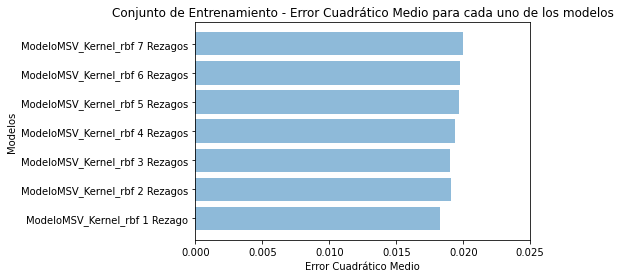

In [40]:
ypos = ['ModeloMSV_Kernel_rbf 1 Rezago','ModeloMSV_Kernel_rbf 2 Rezagos','ModeloMSV_Kernel_rbf 3 Rezagos','ModeloMSV_Kernel_rbf 4 Rezagos',
        'ModeloMSV_Kernel_rbf 5 Rezagos','ModeloMSV_Kernel_rbf 6 Rezagos','ModeloMSV_Kernel_rbf 7 Rezagos']


plt.barh(ypos, EcmTrainSVR_Krbf, align='center', alpha=0.5)
plt.title('Conjunto de Entrenamiento - Error Cuadrático Medio para cada uno de los modelos')
plt.xlabel('Error Cuadrático Medio')
plt.ylabel('Modelos')
plt.xlim(0.0, .025)
plt.show()

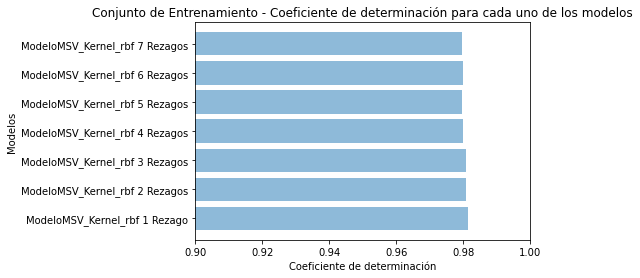

In [41]:
plt.barh(ypos, R2_TrainSVR_Krbf, align='center', alpha=0.5)
plt.title('Conjunto de Entrenamiento - Coeficiente de determinación para cada uno de los modelos')
plt.xlabel('Coeficiente de determinación')
plt.ylabel('Modelos')
plt.xlim(0.9, 1)
plt.show()

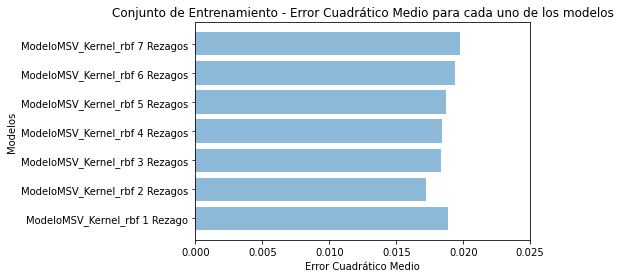

In [42]:
plt.barh(ypos, EcmTestSVR_Krbf, align='center', alpha=0.5)
plt.title('Conjunto de Entrenamiento - Error Cuadrático Medio para cada uno de los modelos')
plt.xlabel('Error Cuadrático Medio')
plt.ylabel('Modelos')
plt.xlim(0.0, .025)
plt.show()

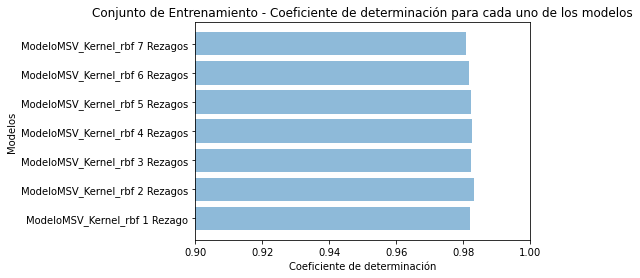

In [43]:
plt.barh(ypos, R2_TestSVR_Krbf, align='center', alpha=0.5)
plt.title('Conjunto de Entrenamiento - Coeficiente de determinación para cada uno de los modelos')
plt.xlabel('Coeficiente de determinación')
plt.ylabel('Modelos')
plt.xlim(0.9, 1)
plt.show()

In [44]:
#Cálculo de predicciones en términos de las unidades originales de las variables

index = R2_TestSVR_Krbf.index(np.max(R2_TestSVR_Krbf))+1

realBitcoinTest = np.exp(sc_y.inverse_transform(y_testStand[index]))
precidccionesBitcoinTest = np.exp(sc_y.inverse_transform(predTestSVR_Krbf[index]))

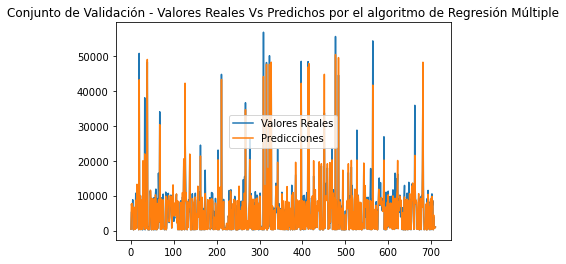

In [45]:
plt.plot(realBitcoinTest, label = "Valores Reales")
plt.plot(precidccionesBitcoinTest, label = "Predicciones")
plt.title("Conjunto de Validación - Valores Reales Vs Predichos por el algoritmo de Regresión Múltiple")
plt.legend()
plt.show()

C:\Users\jogar\anaconda3.8\envs\ITT_Bigdata\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


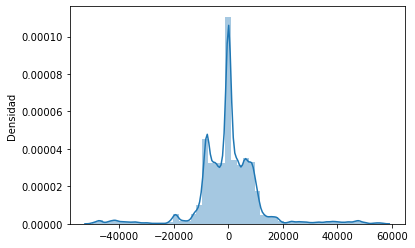

In [46]:
import seaborn as sns

sns.distplot((realBitcoinTest - precidccionesBitcoinTest), bins = 50)
plt.ylabel("Densidad")
plt.show()

In [47]:
# Modelo final

# 1.- Extracción de la información correspondiente a las variables y, X
y_final = y_list[3]
X_final = X_list[3]

# 2.- Estandarización de todo el dataframe
y_final = y_final.values
y_final = y_final.reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X_final = sc_X.fit_transform(X_final)
y_final = sc_y.fit_transform(y_final)


# Entrenamiento del modelo Final

modeloSVR_Krbf_final = svm.SVR(kernel='rbf', gamma='auto')
modeloSVR_Krbf_final.fit(X_final, y_final)

# Predicciones con los datos de entrenamiento
y_pred_final= modeloSVR_Krbf_final.predict(X_final)

# Cálculo de las medidas de ajuste del algoritmo
ErrorCueadraticoMedioFinal = mean_squared_error(y_final, y_pred_final)
R2_Final = r2_score(y_final, y_pred_final)

print("============================================================================================")
print()
print("El error cuadrático medio para el modelo final es:", round(ErrorCueadraticoMedioFinal,4))
print()
print("El coeficiente de determinación(R2) para el modelo final es:", round(R2_Final,4))
print()
print("============================================================================================")

C:\Users\jogar\anaconda3.8\envs\ITT_Bigdata\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



El error cuadrático medio para el modelo final es: 0.0185

El coeficiente de determinación(R2) para el modelo final es: 0.9815



In [48]:
import joblib

joblib.dump(sc_X, 'estandariza_X.pkl')
joblib.dump(sc_y, 'estandariza_y.pkl')
joblib.dump(modeloSVR_Krbf_final, 'modeloSVR_Krbf_final.pkl')

['modeloSVR_Krbf_final.pkl']


# Anexo 

## Otras criptomonedas

#### aplicación del modelo a otras critomedas 

In [75]:
import pymongo
uri="mongodb://localhost:27017"
cx=pymongo.MongoClient(uri)
mndb = cx["BD_proyecto"]
mycol = mndb['bbdd2']
null = 'null' 

In [76]:
for inst in mycol.aggregate([{ "$group": {"_id": null,"MaximumValue": { "$max": "$Date" }}}]):
    fecmax=inst ['MaximumValue']
print(fecmax) 

2021-01-05


In [77]:
list_emp = []
for inst in  mycol.distinct( "Desc" ) : 
    list_emp.append(inst) 
    
print(list_emp)  

['Cardano', 'Dash', 'Dogecoin', 'Ether', 'Litecoin', 'Miota', 'Monero', 'Nem', 'Neo', 'PeerCoin', 'Ripple']


In [78]:
enum_emp = enumerate(list_emp)
for enum_emp in enumerate(list_emp):
    print(enum_emp)

(0, 'Cardano')
(1, 'Dash')
(2, 'Dogecoin')
(3, 'Ether')
(4, 'Litecoin')
(5, 'Miota')
(6, 'Monero')
(7, 'Nem')
(8, 'Neo')
(9, 'PeerCoin')
(10, 'Ripple')


In [79]:
x=int(input("introduce número identificativo de criptomoneda de campo que quieres comparar==> "))
print(list_emp[x])
cryp = list_emp[x]

introduce número identificativo de criptomoneda de campo que quieres comparar==> 1
Dash


In [80]:
datos=[]
#for inst in mycol.find({"Desc":list_emp[x]},{"_id": 0,"Date":1,"Close":1}):  
for inst in mycol.find({"Desc":list_emp[x]},{"_id": 0}):  
    datos.append(inst)
#    print(inst) 

In [81]:
#datos
from pandas import DataFrame 
df_cryp = DataFrame (datos)
df_cryp.sort_values(by="Date", ascending=False)
df_cryp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Desc
0,2014-09-17,3.327650,3.878730,3.297880,3.753940,3.753940,574556,Dash
1,2014-09-18,3.775540,3.950010,3.588730,3.868900,3.868900,438932,Dash
2,2014-09-19,3.865930,3.924180,3.372750,3.432100,3.432100,353146,Dash
3,2014-09-20,3.429370,3.577550,3.144340,3.183440,3.183440,211501,Dash
4,2014-09-21,3.177560,3.269970,2.921020,2.970510,2.970510,142460,Dash


In [82]:
df_cryp_cierre = df_cryp[["Date","Close"]]
df_cryp_cierre = df_cryp_cierre.rename(columns = {"Close" : "Close"+cryp})
df_cryp_cierre.set_index('Date', inplace = True) 

In [83]:
df_cryp_cierre['CloseDash'].replace({'null': 'NaN'},inplace =True)
df_cryp_cierre
#df_cryp_cierre1 =df_cryp_cierre.ffill()
#df_cryp_cierre1 =df_cryp_cierre.bfill()

,CloseDash
Date,
2014-09-17,3.753940
2014-09-18,3.868900
2014-09-19,3.432100
2014-09-20,3.183440
2014-09-21,2.970510
...,...
2021-01-01,88.241707
2021-01-02,86.969772
2021-01-03,89.069138


In [84]:
import numpy as np
df_cryp_cierre1   = df_cryp_cierre.astype(float)
df_cryp_cierre1 


,CloseDash
Date,
2014-09-17,3.753940
2014-09-18,3.868900
2014-09-19,3.432100
2014-09-20,3.183440
2014-09-21,2.970510
...,...
2021-01-01,88.241707
2021-01-02,86.969772
2021-01-03,89.069138


In [85]:
df_cryp_cierre2=df_cryp_cierre1.dropna() 
#df_cryp_cierre1 = df.df_cryp_cierre(subset, inplace=True)
#df_cryp_cierre1 = df_cryp_cierre1.reset_index(drop=True)
df_cryp_cierre2

,CloseDash
Date,
2014-09-17,3.753940
2014-09-18,3.868900
2014-09-19,3.432100
2014-09-20,3.183440
2014-09-21,2.970510
...,...
2021-01-01,88.241707
2021-01-02,86.969772
2021-01-03,89.069138


In [86]:
df_cryp_cierre_log = pd.DataFrame(np.log1p(df_cryp_cierre2))
#df_cryp_cierre_log = DataFrame (df_cryp_cierre2)
df_cryp_cierre_log

,CloseDash
Date,
2014-09-17,1.558974
2014-09-18,1.582868
2014-09-19,1.488874
2014-09-20,1.431134
2014-09-21,1.378895
...,...
2021-01-01,4.491348
2021-01-02,4.476993
2021-01-03,4.500578


In [87]:
y_nueva1 = df_cryp_cierre_log.iloc[:,0]
y_nueva1

Date
2014-09-17    1.558974
2014-09-18    1.582868
2014-09-19    1.488874
2014-09-20    1.431134
2014-09-21    1.378895
                ...   
2021-01-01    4.491348
2021-01-02    4.476993
2021-01-03    4.500578
2021-01-04    4.497553
2021-01-05    4.500951
Name: CloseDash, Length: 2299, dtype: float64

In [88]:
y_nueva1 = y_nueva1.values
y_nueva1 = y_nueva1.reshape(-1,1) 

In [89]:
y_nueva1

array([[1.55897375],
       [1.58286804],
       [1.48887351],
       ...,
       [4.50057758],
       [4.49755349],
       [4.50095097]])

In [ ]:
#y_nueva1 = sc_y.fit_transform(y_nueva1)

In [ ]:
#y_pred_nueva1= modeloSVR_Krbf_final.predict(X_final)

In [90]:
X_final

array([[-1.3687427 , -1.81739997, -1.76265142, -1.17218319],
       [-1.41096862, -1.84833992, -1.80200469, -1.19066896],
       [-1.44160672, -1.85233347, -1.74930796, -1.21096831],
       ...,
       [ 1.82089241,  1.54805102,  1.62105448,  1.73686089],
       [ 1.78903326,  1.53841975,  1.63302021,  1.7253172 ],
       [ 1.70439875,  1.52719078,  1.57704047,  1.67199249]])

In [91]:
df_combinad2_log2=df_combinad2_log.drop(columns=['CloseBTC_USD'])
df_combinad2_log2

,CloseGOOG,CloseAMZN,CloseFB,CloseMSFT
Date,,,,
2014-09-17,6.368477,5.780744,4.336375,3.839882
2014-09-18,6.376143,5.783825,4.343805,3.843316
2014-09-19,6.387633,5.803085,4.355554,3.861151
2014-09-20,6.387633,5.803085,4.355554,3.861151
2014-09-21,6.387633,5.803085,4.355554,3.861151
...,...,...,...,...
2021-01-10,7.476880,8.043731,5.548453,5.382153
2021-01-09,7.476880,8.043731,5.548453,5.382153
2021-01-08,7.499539,8.065485,5.589381,5.391899


In [92]:
df_X = df_cryp_cierre_log.join(df_combinad2_log2)

In [93]:
df_X

,CloseDash,CloseGOOG,CloseAMZN,CloseFB,CloseMSFT
Date,,,,,
2014-09-17,1.558974,6.368477,5.780744,4.336375,3.839882
2014-09-18,1.582868,6.376143,5.783825,4.343805,3.843316
2014-09-19,1.488874,6.387633,5.803085,4.355554,3.861151
2014-09-20,1.431134,6.387633,5.803085,4.355554,3.861151
2014-09-21,1.378895,6.387633,5.803085,4.355554,3.861151
...,...,...,...,...,...
2021-01-01,4.491348,7.468445,8.088540,5.610058,5.404567
2021-01-02,4.476993,7.468445,8.088540,5.610058,5.404567
2021-01-03,4.500578,7.468445,8.088540,5.610058,5.404567


In [94]:
y_final1 = df_X.iloc[:,0]
X_final1 = df_X.loc[:,['CloseGOOG','CloseAMZN','CloseFB','CloseMSFT']]

In [95]:
y_final1 = y_final1.values
y_final1 = y_final1.reshape(-1,1)

In [96]:
X_final1

,CloseGOOG,CloseAMZN,CloseFB,CloseMSFT
Date,,,,
2014-09-17,6.368477,5.780744,4.336375,3.839882
2014-09-18,6.376143,5.783825,4.343805,3.843316
2014-09-19,6.387633,5.803085,4.355554,3.861151
2014-09-20,6.387633,5.803085,4.355554,3.861151
2014-09-21,6.387633,5.803085,4.355554,3.861151
...,...,...,...,...
2021-01-01,7.468445,8.088540,5.610058,5.404567
2021-01-02,7.468445,8.088540,5.610058,5.404567
2021-01-03,7.468445,8.088540,5.610058,5.404567


In [97]:
X_final1 = X_final1.values

In [98]:
X_final1 = sc_X.fit_transform(X_final1)
y_final1 = sc_y.fit_transform(y_final1)

In [99]:
sc_y = joblib.load('estandariza_y.pkl')
modelo = joblib.load('modeloSVR_Krbf_final.pkl')

In [100]:
y_pred_nueva1=modelo.predict(X_final1)

In [101]:
len(y_pred_nueva1)

2299

In [102]:
#ErrorCueadraticoMedioFinal1 = mean_squared_error(y_final1, y_pred_nueva1)
#np.nan(y_final1)
#np.isnan(y_nueva1).sum() 
#df_cryp_cierre_log.isnull().values.sum()
nan_rows = df_cryp_cierre_log[df_cryp_cierre_log.isnull().any(1)]
nan_rows

,CloseDash
Date,


In [103]:
# Cálculo de las medidas de ajuste del algoritmo
ErrorCueadraticoMedioFinal1 = mean_squared_error(y_final1, y_pred_nueva1)
R2_Final1 = r2_score(y_final1, y_pred_nueva1)

print("============================================================================================")
print()
print("El error cuadrático medio para el modelo final es:", round(ErrorCueadraticoMedioFinal1,4))
print()
print("El coeficiente de determinación(R2) para el modelo final es:", round(R2_Final1,4))
print()
print("============================================================================================")


El error cuadrático medio para el modelo final es: 0.2148

El coeficiente de determinación(R2) para el modelo final es: 0.7852

